In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh

In [2]:
#h =  !hostname
h = 'test'

if h[0] == 'cio-Aspire-VN7-593G':
    folder = '../covid19-opendata-vaccini/'
    df_anagrafica = pd.read_csv(folder +'dati/anagrafica-vaccini-summary-latest.csv')  # si aggiorna
    #df_consegne = pd.read_csv(folder +'dati/consegne-vaccini-latest.csv') # si aggiorna
    df_platea = pd.read_csv(folder +'dati/platea.csv')
    df_platea_booster = pd.read_csv(folder +'dati/platea-dose-addizionale-booster.csv')
    #df_punti_som_latest = pd.read_csv(folder +'dati/punti-somministrazione-latest.csv')
    #df_punti_som_tipologia = pd.read_csv(folder +'dati/punti-somministrazione-tipologia.csv')
    #df_guariti = pd.read_csv(folder +'dati/soggetti-guariti.csv')  # si aggiorna
    df_somministrazione = pd.read_csv(folder +'dati/somministrazioni-vaccini-latest.csv', parse_dates = ['data_somministrazione'])  # si aggiorna
    df_somministrazione_summary = pd.read_csv(folder +'dati/somministrazioni-vaccini-summary-latest.csv', parse_dates = ['data_somministrazione'])  # si aggiorna
    #df_vaccini = pd.read_csv(folder +'dati/vaccini-summary-latest.csv')   # si aggiorna
    print("Fine caricamento dataframe da dataset locali")
else:
    print("Inizio download dataset da github\n...")    
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/anagrafica-vaccini-summary-latest.csv"
    df_anagrafica = pd.read_csv(url) #, parse_dates = ['ultimo_aggiornamento']
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv"
    df_platea = pd.read_csv(url)
    url="https://github.com/italia/covid19-opendata-vaccini/raw/master/dati/platea-dose-addizionale-booster.csv"
    df_platea_booster = pd.read_csv(url)
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv"
    df_somministrazione = pd.read_csv(url, parse_dates = ['data_somministrazione'])
    url="https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-summary-latest.csv"
    df_somministrazione_summary = pd.read_csv(url, parse_dates = ['data_somministrazione'])
    print("Fine download")
    

Inizio download dataset da github
...
Fine download


In [3]:
!ls

analisi_esplorativa_COVID.ipynb      README.md
analisi_esplorativa_vaccini.ipynb    somministrazione_vaccini.ipynb
analisi_platea_vs_popolazione.ipynb


# Elenco dataset

## Anagrafica df_anagrafica

In [4]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,710421,366575,343846,638054,71340,1027,0,2022-01-11
1,12-19,7451089,3827847,3623242,3681050,3314789,120845,334405,2022-01-11
2,20-29,11980203,6195040,5785163,5298385,4929971,211475,1540372,2022-01-11
3,30-39,13056899,6635943,6420956,5697602,5293948,212040,1853309,2022-01-11
4,40-49,17473740,8629358,8844382,7255604,6790826,288379,3138931,2022-01-11
5,50-59,21011674,10292268,10719406,8271102,7648930,341075,4750567,2022-01-11
6,60-69,17537271,8530336,9006935,6691706,6107419,232556,4505590,2022-01-11
7,70-79,14989262,7073056,7916206,5481864,5234707,158666,4114025,2022-01-11
8,80-89,9863976,4098389,5765587,3488405,3417926,76681,2880964,2022-01-11
9,90+,2181646,648488,1533158,805657,776342,19856,579791,2022-01-11


In [5]:
df_anagrafica.shape

(10, 9)

## Platea df_platea

In [6]:
df_platea

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,05-11,76431
1,ABR,Abruzzo,12-19,94727
2,ABR,Abruzzo,20-29,125230
3,ABR,Abruzzo,30-39,146965
4,ABR,Abruzzo,40-49,187162
...,...,...,...,...
184,VEN,Veneto,40-49,715790
185,VEN,Veneto,50-59,806474
186,VEN,Veneto,60-69,610635
187,VEN,Veneto,70-79,494721


In [7]:
df_platea.groupby(['area', 'nome_area']).sum()

,,totale_popolazione
area,nome_area,
ABR,Abruzzo,1265353
BAS,Basilicata,523836
CAL,Calabria,1803821
CAM,Campania,5481138
EMR,Emilia-Romagna,4266930
FVG,Friuli-Venezia Giulia,1154702
LAZ,Lazio,5522780
LIG,Liguria,1479768
LOM,Lombardia,9883969


## Platea booster df_platea_booster

In [8]:
df_platea_booster

,area,nome_area,categoria_prevalente,totale_popolazione
0,ABR,Abruzzo,12-19,44530
1,ABR,Abruzzo,20-29,88586
2,ABR,Abruzzo,30-39,93927
3,ABR,Abruzzo,40-49,130875
4,ABR,Abruzzo,50-59,160438
...,...,...,...,...
163,VEN,Veneto,40-49,477827
164,VEN,Veneto,50-59,617744
165,VEN,Veneto,60-69,527158
166,VEN,Veneto,70-79,451220


## Somministrazione df_somministrazione

In [9]:
df_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Moderna,SIC,90+,0,1,1,0,0,0,ITG,ITG1,19,Sicilia
1,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172673,2022-01-10,Pfizer/BioNTech,VEN,50-59,1228,1218,315,231,13,1887,ITH,ITH3,5,Veneto
172674,2022-01-10,Pfizer/BioNTech,VEN,60-69,986,1037,277,138,2,1606,ITH,ITH3,5,Veneto
172675,2022-01-10,Pfizer/BioNTech,VEN,70-79,542,672,152,72,1,989,ITH,ITH3,5,Veneto
172676,2022-01-10,Pfizer/BioNTech,VEN,80-89,173,249,64,17,0,341,ITH,ITH3,5,Veneto


In [10]:
df_somministrazione.dtypes

data_somministrazione       datetime64[ns]
fornitore                           object
area                                object
fascia_anagrafica                   object
sesso_maschile                       int64
sesso_femminile                      int64
prima_dose                           int64
seconda_dose                         int64
pregressa_infezione                  int64
dose_addizionale_booster             int64
codice_NUTS1                        object
codice_NUTS2                        object
codice_regione_ISTAT                 int64
nome_area                           object
dtype: object

In [11]:
#check range date
df_somministrazione['data_somministrazione'].describe(datetime_is_numeric=True)

count                           172678
mean     2021-07-12 20:09:39.242289152
min                2020-12-27 00:00:00
25%                2021-04-30 00:00:00
50%                2021-07-10 00:00:00
75%                2021-09-26 00:00:00
max                2022-01-10 00:00:00
Name: data_somministrazione, dtype: object

In [12]:
# check granularità dati
np.sort(df_somministrazione['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [13]:
df_subset_somministrazione = df_somministrazione[df_somministrazione['data_somministrazione'] == '2021-12-15']
df_subset_somministrazione.shape


(400, 14)

In [14]:
df_subset_somministrazione

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
162045,2021-12-15,Janssen,EMR,30-39,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162046,2021-12-15,Janssen,EMR,40-49,1,1,2,0,0,0,ITH,ITH5,8,Emilia-Romagna
162047,2021-12-15,Janssen,EMR,50-59,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162048,2021-12-15,Janssen,EMR,70-79,0,1,1,0,0,0,ITH,ITH5,8,Emilia-Romagna
162049,2021-12-15,Janssen,FVG,60-69,1,0,1,0,0,0,ITH,ITH4,6,Friuli-Venezia Giulia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162440,2021-12-15,Pfizer/BioNTech,VEN,50-59,2137,2449,203,159,2,4222,ITH,ITH3,5,Veneto
162441,2021-12-15,Pfizer/BioNTech,VEN,60-69,2009,2388,103,103,2,4189,ITH,ITH3,5,Veneto
162442,2021-12-15,Pfizer/BioNTech,VEN,70-79,2447,2863,81,72,0,5157,ITH,ITH3,5,Veneto
162443,2021-12-15,Pfizer/BioNTech,VEN,80-89,964,1648,32,45,0,2535,ITH,ITH3,5,Veneto


In [15]:
df_somministrazione['fornitore'].unique()

array(['Moderna', 'Pfizer/BioNTech', 'Janssen', 'Vaxzevria (AstraZeneca)',
       'Pfizer Pediatrico'], dtype=object)

### Verifico che la colonna 'area' vada bene per la join tra sooministrazione e platea

In [16]:
set(df_somministrazione['area'].unique()) ^ set(df_platea['area'].unique())

set()

## Somministrazione sumary df_somministrazione_summary

In [17]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-04-11,CAM,17534,8613,8921,15076,2090,368,0,ITF,ITF3,15,Campania
1,2021-05-24,FVG,11543,5588,5955,7539,3676,328,0,ITH,ITH4,6,Friuli-Venezia Giulia
2,2021-06-04,BAS,4833,2289,2544,3745,1046,42,0,ITF,ITF5,17,Basilicata
3,2021-11-25,EMR,27752,12623,15129,1957,1178,71,24546,ITH,ITH5,8,Emilia-Romagna
4,2021-02-22,ABR,2642,1174,1468,2593,30,19,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,2021-11-02,SIC,10961,6098,4863,1723,5702,172,3364,ITG,ITG1,19,Sicilia
7881,2021-02-28,CAL,2416,1095,1321,2249,161,6,0,ITF,ITF6,18,Calabria
7882,2021-04-19,UMB,5084,2254,2830,2929,2091,64,0,ITI,ITI2,10,Umbria
7883,2021-09-20,CAM,18105,9508,8597,7331,9498,754,522,ITF,ITF3,15,Campania


In [18]:
df_somministrazione['data_somministrazione'].describe(datetime_is_numeric=True)

count                           172678
mean     2021-07-12 20:09:39.242289152
min                2020-12-27 00:00:00
25%                2021-04-30 00:00:00
50%                2021-07-10 00:00:00
75%                2021-09-26 00:00:00
max                2022-01-10 00:00:00
Name: data_somministrazione, dtype: object

In [19]:
np.sort(df_somministrazione_summary['data_somministrazione'].unique())

array(['2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-12T00:00:00.000000000', '2021-01-13T00:00:00.000000000',
       '2021-01-14T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-16T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-19T00:00:00.000000000',
       '2021-01-20T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-01-23

In [20]:
df_subset = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-12-15']
df_subset.shape

(21, 13)

In [21]:
#verifico la presenza di tutte le regioni:
df_subset.sort_values('codice_regione_ISTAT')

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
5746,2021-12-15,PIE,33749,15632,18117,2094,1516,29,30110,ITC,ITC1,1,Piemonte
3436,2021-12-15,VDA,1485,716,769,61,15,0,1409,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
5511,2021-12-15,LOM,102317,47876,54441,3479,2012,100,96726,ITC,ITC4,3,Lombardia
70,2021-12-15,PAB,2631,1283,1348,220,286,1,2124,ITH,ITH1,4,Provincia Autonoma Bolzano / Bozen
6705,2021-12-15,PAT,3312,1438,1874,236,205,3,2868,ITH,ITH2,4,Provincia Autonoma Trento
6986,2021-12-15,VEN,55383,25797,29586,2711,1827,88,50757,ITH,ITH3,5,Veneto
5091,2021-12-15,FVG,11568,5600,5968,425,649,2,10492,ITH,ITH4,6,Friuli-Venezia Giulia
6041,2021-12-15,LIG,16292,7445,8847,1044,943,4,14301,ITC,ITC3,7,Liguria
4154,2021-12-15,EMR,39687,18058,21629,1711,893,62,37021,ITH,ITH5,8,Emilia-Romagna
6655,2021-12-15,TOS,37575,17148,20427,2156,1587,88,33744,ITI,ITI1,9,Toscana


In [22]:
np.sort(df_somministrazione_summary['codice_regione_ISTAT'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [23]:
# Verifico che la colonna 'area' vada bene per la join tra somministrazione_summary e platea
set(df_somministrazione_summary['area'].unique()) ^ set(df_platea['area'].unique())

set()

### Colonne differenti tra df_somministrazione e df_somministrazione_summary

In [24]:
set_somm = set(df_somministrazione.columns)

In [25]:
set_somm_summary = set(df_somministrazione_summary.columns)

In [26]:
#differenza simmetrica
set_somm ^ set_somm_summary

{'fascia_anagrafica', 'fornitore', 'totale'}

In [27]:
#Colonne presenti solo in df_somministrazione
set_somm - set_somm_summary

{'fascia_anagrafica', 'fornitore'}

In [28]:
#Colonne presenti solo in df_somministrazione_summary
set_somm_summary - set_somm

{'totale'}

# Analisi

### Da cancellare alla fine

In [29]:
df_somministrazione_summary.head()

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-04-11,CAM,17534,8613,8921,15076,2090,368,0,ITF,ITF3,15,Campania
1,2021-05-24,FVG,11543,5588,5955,7539,3676,328,0,ITH,ITH4,6,Friuli-Venezia Giulia
2,2021-06-04,BAS,4833,2289,2544,3745,1046,42,0,ITF,ITF5,17,Basilicata
3,2021-11-25,EMR,27752,12623,15129,1957,1178,71,24546,ITH,ITH5,8,Emilia-Romagna
4,2021-02-22,ABR,2642,1174,1468,2593,30,19,0,ITF,ITF1,13,Abruzzo


In [30]:
df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] == '2021-09-01'].groupby('data_somministrazione').sum()

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-09-01,314284,164341,149943,124231,178710,11343,0,214


In [31]:
df_plot = df_somministrazione_summary[df_somministrazione_summary['data_somministrazione'] > '2021-12-01'].groupby('data_somministrazione').sum()

In [32]:
df_plot

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2021-12-02,493686,228596,265090,32941,21209,884,438652,214
2021-12-03,523231,238433,284798,34448,22410,872,465501,214
2021-12-04,470106,213085,257021,32071,19721,758,417556,214
2021-12-05,293974,137869,156105,22879,10052,529,260514,214
2021-12-06,523069,248961,274108,44076,22230,949,455814,214
2021-12-07,542309,252972,289337,42591,20618,760,478340,214
2021-12-08,281055,135135,145920,23490,7980,476,249109,214
2021-12-09,557072,261959,295113,38135,27846,805,490286,214
2021-12-10,576451,264887,311564,35927,24486,787,515251,214


## Tipi di plot

### Seaborn

In [33]:
sns.set_style("darkgrid")

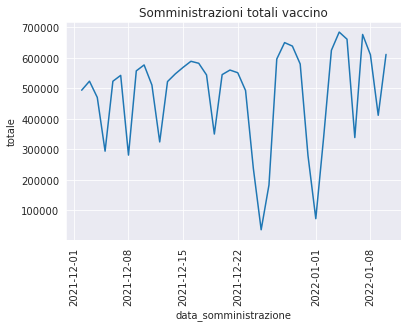

In [34]:
sns.lineplot(x="data_somministrazione", y="totale",\
             data=df_plot)
plt.xticks(rotation=90)
plt.title('Somministrazioni totali vaccino')
plt.show()

### Plot pandas

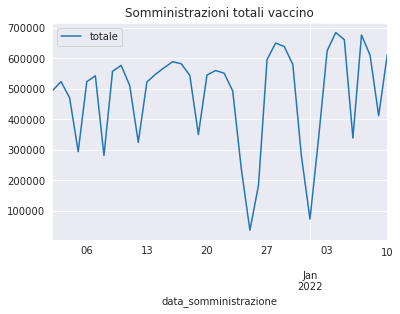

In [35]:
df_plot.plot(y="totale", title = 'Somministrazioni totali vaccino')
plt.show()

### Pandas bokeh

In [36]:
pandas_bokeh.output_notebook()

g = df_plot.plot_bokeh(y="totale", kind='line', vertical_xlabel = True)
#g.xaxis.major_label_orientation = 78



Loading BokehJS ...

In [37]:
df_somministrazione_summary

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2021-04-11,CAM,17534,8613,8921,15076,2090,368,0,ITF,ITF3,15,Campania
1,2021-05-24,FVG,11543,5588,5955,7539,3676,328,0,ITH,ITH4,6,Friuli-Venezia Giulia
2,2021-06-04,BAS,4833,2289,2544,3745,1046,42,0,ITF,ITF5,17,Basilicata
3,2021-11-25,EMR,27752,12623,15129,1957,1178,71,24546,ITH,ITH5,8,Emilia-Romagna
4,2021-02-22,ABR,2642,1174,1468,2593,30,19,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7880,2021-11-02,SIC,10961,6098,4863,1723,5702,172,3364,ITG,ITG1,19,Sicilia
7881,2021-02-28,CAL,2416,1095,1321,2249,161,6,0,ITF,ITF6,18,Calabria
7882,2021-04-19,UMB,5084,2254,2830,2929,2091,64,0,ITI,ITI2,10,Umbria
7883,2021-09-20,CAM,18105,9508,8597,7331,9498,754,522,ITF,ITF3,15,Campania


### FINE Da cancellare alla fine

## Andamento vaccini totale - prima, seconda, booster

In [38]:
df_somministrazione_summary.sort_values('data_somministrazione').head(5)

,data_somministrazione,area,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
5747,2020-12-27,MAR,210,100,110,209,0,1,0,ITI,ITI3,11,Marche
2121,2020-12-27,UMB,92,51,41,92,0,0,0,ITI,ITI2,10,Umbria
3562,2020-12-27,LIG,135,56,79,134,0,1,0,ITC,ITC3,7,Liguria
2806,2020-12-27,EMR,973,374,599,973,0,0,0,ITH,ITH5,8,Emilia-Romagna
3001,2020-12-27,CAL,318,170,148,318,0,0,0,ITF,ITF6,18,Calabria


In [39]:
#Raggruppo somministrazioDF che ha informazione divisa per regioni 
df_somm_grouped = df_somministrazione_summary.groupby('data_somministrazione').sum()

In [40]:
df_somm_grouped

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT
data_somministrazione,,,,,,,,
2020-12-27,7346,3499,3847,7331,0,15,0,214
2020-12-28,1503,687,816,1501,0,2,0,85
2020-12-29,1119,491,628,1118,0,1,0,86
2020-12-30,4869,1958,2911,4867,0,2,0,105
2020-12-31,25930,10057,15873,25896,0,34,0,152
...,...,...,...,...,...,...,...,...
2022-01-06,338584,170807,167777,45327,19399,863,272995,214
2022-01-07,676356,331853,344503,74093,55777,1665,544821,214
2022-01-08,609829,301409,308420,79762,51056,1459,477552,214


In [41]:
g = df_somm_grouped.plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

### Andamento storico somministrazione dosi con media settimanale

In [124]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = [\
                           'prima_dose','seconda_dose', 'dose_addizionale_booster', 'pregressa_infezione'],
                           vertical_xlabel = True, title="Somministrazione dosi con media settimanale", figsize=(950, 500),\
                               legend="top_left", stacked=True, kind='bar')#, logy=True)

In [43]:
g = df_somm_grouped.plot_bokeh(y = ['prima_dose','seconda_dose', 'dose_addizionale_booster',\
                                    'pregressa_infezione', 'totale',],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),\
                               legend="top_left")#, logy=True)

In [44]:
g = df_somm_grouped.resample(rule='W').mean().plot_bokeh(y = ['prima_dose','seconda_dose',\
                                        'dose_addizionale_booster', 'pregressa_infezione', 'totale'],
                           vertical_xlabel = True, title="-----------", figsize=(950, 500),
                                                 legend="top_left")#, logy=True)

In [45]:
#Verifica significato 'totale' vaccini
df_check = df_somm_grouped.copy(deep = True)
df_check.loc[:, 'check_totale'] = df_check['prima_dose'] + df_check['seconda_dose'] + df_check['dose_addizionale_booster'] + df_check['pregressa_infezione']
df_check

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_regione_ISTAT,check_totale
data_somministrazione,,,,,,,,,
2020-12-27,7346,3499,3847,7331,0,15,0,214,7346
2020-12-28,1503,687,816,1501,0,2,0,85,1503
2020-12-29,1119,491,628,1118,0,1,0,86,1119
2020-12-30,4869,1958,2911,4867,0,2,0,105,4869
2020-12-31,25930,10057,15873,25896,0,34,0,152,25930
...,...,...,...,...,...,...,...,...,...
2022-01-06,338584,170807,167777,45327,19399,863,272995,214,338584
2022-01-07,676356,331853,344503,74093,55777,1665,544821,214,676356
2022-01-08,609829,301409,308420,79762,51056,1459,477552,214,609829


## Vaccini per fasce anagrafiche

In [46]:
df_somministrazione.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172678 entries, 0 to 172677
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   data_somministrazione     172678 non-null  datetime64[ns]
 1   fornitore                 172678 non-null  object        
 2   area                      172678 non-null  object        
 3   fascia_anagrafica         172678 non-null  object        
 4   sesso_maschile            172678 non-null  int64         
 5   sesso_femminile           172678 non-null  int64         
 6   prima_dose                172678 non-null  int64         
 7   seconda_dose              172678 non-null  int64         
 8   pregressa_infezione       172678 non-null  int64         
 9   dose_addizionale_booster  172678 non-null  int64         
 10  codice_NUTS1              172678 non-null  object        
 11  codice_NUTS2              172678 non-null  object        
 12  co

In [47]:
df_somministrazione.tail()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
172673,2022-01-10,Pfizer/BioNTech,VEN,50-59,1228,1218,315,231,13,1887,ITH,ITH3,5,Veneto
172674,2022-01-10,Pfizer/BioNTech,VEN,60-69,986,1037,277,138,2,1606,ITH,ITH3,5,Veneto
172675,2022-01-10,Pfizer/BioNTech,VEN,70-79,542,672,152,72,1,989,ITH,ITH3,5,Veneto
172676,2022-01-10,Pfizer/BioNTech,VEN,80-89,173,249,64,17,0,341,ITH,ITH3,5,Veneto
172677,2022-01-10,Pfizer/BioNTech,VEN,90+,29,80,6,7,0,96,ITH,ITH3,5,Veneto


In [48]:
# Faccio pivot per ottenere andamento somministrazioni per ciascuna fascia di età
#faccio prima pivot intermedia per consentire di calcolare il totale dei vaccini
df_pivot = pd.pivot_table(df_somministrazione, index = ['data_somministrazione', 'fascia_anagrafica'], aggfunc=np.sum)
df_pivot

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2020-12-27            20-29                               214   
                      30-39                               214   
                      40-49                               214   
                      50-59                               214   
                      60-69                               214   
...                                                       ...   
2022-01-10            50-59                               457   
                      60-69                               445   
                      70-79                               434   
                      80-89                               426   
                      90+                                 421   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2020-12-27            20-29                                     0   
                      30-39                                     0   
                      40-49                                     0   
                      50-59                                     0   
                      60-69                                     0   
...                                                           ...   
2022-01-10            50-59                                 99853   
                      60-69                                 80676   
                      70-79                                 53464   
                      80-89                                 13335   
                      90+                                    2373   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2020-12-27            20-29                                0         704   
                      30-39                                0        1088   
                      40-49                                2        1506   
                      50-59                                3        2204   
                      60-69                                5        1508   
...                                                      ...         ...   
2022-01-10            50-59                              158        7878   
                      60-69                               38        6171   
                      70-79                               20        3541   
                      80-89                                7        1344   
                      90+                                  0         248   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2020-12-27            20-29                         0              446   
                      30-39                         0              598   
                      40-49                         0              939   
                      50-59                         0             1255   
                      60-69                         0              412   
...                                               ...              ...   
2022-01-10            50-59                      6389            56496   
                      60-69                      4217            47166   
                      70-79                      2153            32443   
                      80-89                       688             9360   
                      90+                         142             1955   

                                         sesso_maschile  
data_somministrazione fascia_anagrafica                  
2020-12-27            20-29                         258  
                      30-39                         490  
                      40-49                         569  
                      50-59                         952

In [49]:
df_pivot.loc[:, 'totale_vaccini'] = df_pivot['prima_dose'] + df_pivot['seconda_dose']\
                        + df_pivot['dose_addizionale_booster'] + df_pivot['pregressa_infezione']
df_pivot.loc['2022-01-09', :]

codice_regione_ISTAT  \
data_somministrazione fascia_anagrafica                         
2022-01-09            05-11                               193   
                      12-19                               426   
                      20-29                               434   
                      30-39                               440   
                      40-49                               444   
                      50-59                               440   
                      60-69                               455   
                      70-79                               444   
                      80-89                               422   
                      90+                                 418   

                                         dose_addizionale_booster  \
data_somministrazione fascia_anagrafica                             
2022-01-09            05-11                                     0   
                      12-19                                 16083   
                      20-29                                 40676   
                      30-39                                 44346   
                      40-49                                 60898   
                      50-59                                 70345   
                      60-69                                 44582   
                      70-79                                 26642   
                      80-89                                  7237   
                      90+                                    1175   

                                         pregressa_infezione  prima_dose  \
data_somministrazione fascia_anagrafica                                    
2022-01-09            05-11                               87       36865   
                      12-19                              337        6256   
                      20-29                              265        2150   
                      30-39                              163        3049   
                      40-49                              116        3020   
                      50-59                               89        4848   
                      60-69                               30        3117   
                      70-79                                9        1594   
                      80-89                                0         681   
                      90+                                  0         126   

                                         seconda_dose  sesso_femminile  \
data_somministrazione fascia_anagrafica                                  
2022-01-09            05-11                     18047            26586   
                      12-19                      5551            13453   
                      20-29                      2425            22483   
                      30-39                      2925            24405   
                      40-49                      2803            32931   
                      50-59                      2617            38203   
                      60-69                      1307            24925   
                      70-79                       672            16520   
                      80-89                       310             5089   
                      90+                          51              926   

                                         sesso_maschile  totale_vaccini  
data_somministrazione fascia_anagrafica                                  
2022-01-09            05-11                       28413           54999  
                      12-19                       14774           28227  
                      20-29                       23033           45516  
                      30-39                       26078           50483  
                      40-49                       33906           66837  
                      50-59                       39696           77899  
                      60-69          

In [50]:
df_1 = df_pivot.reset_index('fascia_anagrafica')
df_pivot_2 = df_1.pivot(columns = 'fascia_anagrafica', values = 'totale_vaccini')
df_pivot_2

fascia_anagrafica,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
data_somministrazione,,,,,,,,,,
2020-12-27,NaN,NaN,704.0,1088.0,1508.0,2207.0,1513.0,130.0,118.0,78.0
2020-12-28,NaN,NaN,174.0,278.0,369.0,428.0,252.0,NaN,2.0,NaN
2020-12-29,NaN,NaN,88.0,211.0,244.0,337.0,204.0,14.0,12.0,9.0
2020-12-30,NaN,3.0,495.0,887.0,1245.0,1295.0,590.0,95.0,161.0,98.0
2020-12-31,NaN,23.0,2452.0,4372.0,5834.0,7224.0,3604.0,583.0,1043.0,795.0
...,...,...,...,...,...,...,...,...,...,...
2022-01-06,33763.0,20346.0,42666.0,43840.0,57450.0,65281.0,41432.0,25232.0,7253.0,1321.0
2022-01-07,48121.0,42618.0,77618.0,83121.0,111060.0,130936.0,97207.0,63959.0,18061.0,3655.0
2022-01-08,64746.0,38691.0,65189.0,74385.0,100477.0,119174.0,79192.0,50332.0,14741.0,2902.0


### Andamenti somministrazioni vaccini per fasce di età  
La somministrazione delle prime dosi (+ seconde dosi) ha avuto inizio sceglionato per le diverse fasce di età, mentre la somministrazione della dose booster sta avvenendo con inizio in contemporanea (eccetto per le fasce >80)

In [51]:
g = df_pivot_2.resample(rule='W').mean().plot_bokeh(vertical_xlabel = True,\
                        title="Fasce anagrafiche", figsize=(950, 500), legend="top_left")

### Somministrazioni settimanali vaccini, suddivisi per fasce

In [52]:
g = df_pivot_2.fillna(0).resample(rule='W').mean()\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche",\
            figsize=(950, 500), stacked = True, legend="top_left")

In [53]:
g = df_pivot_2.fillna(0)\
.plot_bokeh(kind = 'bar', vertical_xlabel = True, title="Fasce angrafiche", figsize=(950, 500), stacked = True, legend="top_left")

## Percentuale vaccinati per fasce anagrafiche

In [54]:
df_anagrafica

,fascia_anagrafica,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
0,05-11,710421,366575,343846,638054,71340,1027,0,2022-01-11
1,12-19,7451089,3827847,3623242,3681050,3314789,120845,334405,2022-01-11
2,20-29,11980203,6195040,5785163,5298385,4929971,211475,1540372,2022-01-11
3,30-39,13056899,6635943,6420956,5697602,5293948,212040,1853309,2022-01-11
4,40-49,17473740,8629358,8844382,7255604,6790826,288379,3138931,2022-01-11
5,50-59,21011674,10292268,10719406,8271102,7648930,341075,4750567,2022-01-11
6,60-69,17537271,8530336,9006935,6691706,6107419,232556,4505590,2022-01-11
7,70-79,14989262,7073056,7916206,5481864,5234707,158666,4114025,2022-01-11
8,80-89,9863976,4098389,5765587,3488405,3417926,76681,2880964,2022-01-11
9,90+,2181646,648488,1533158,805657,776342,19856,579791,2022-01-11


In [55]:
df_platea_grouped = df_platea.groupby('fascia_anagrafica').sum()
df_platea_grouped

,totale_popolazione
fascia_anagrafica,
05-11,3656069
12-19,4618524
20-29,6016071
30-39,6794108
40-49,8782667
50-59,9645613
60-69,7553311
70-79,6018697
80+,4580954


In [56]:
df_platea_booster_grouped = df_platea_booster.groupby('categoria_prevalente').sum()
df_platea_booster_grouped.rename(index={'80-89':'80+'},\
                                 columns ={'totale_popolazione': 'totale_popolazione_booster'},inplace=True)
df_platea_booster_grouped

,totale_popolazione_booster
categoria_prevalente,
12-19,1955697
20-29,3923418
30-39,4271568
40-49,6039860
50-59,7425366
60-69,6354604
70-79,5352165
80+,4216335


In [57]:
#In anagrafica sono presenti le fasce '80-89' e '90+', mentre in platea vi è la fascia '80+'
#sommo le 2 face in anagrafica per uniformare
df_somma_righe = df_anagrafica.copy().set_index('fascia_anagrafica')
df_anag_trans = df_somma_righe.transpose()
df_anag_trans.loc[:, '80+'] = df_anag_trans['80-89'] + df_anag_trans['90+']
#ripristtino la data correttamente: 
df_anag_trans.loc['ultimo_aggiornamento','80+'] = df_anag_trans.loc['ultimo_aggiornamento','80+']\
                                        [:len(df_anag_trans.loc['ultimo_aggiornamento','80+'])//2]
df_anag_new = df_anag_trans.drop(columns=['80-89', '90+']).transpose()
df_anag_new

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento
fascia_anagrafica,,,,,,,,
05-11,710421,366575,343846,638054,71340,1027,0,2022-01-11
12-19,7451089,3827847,3623242,3681050,3314789,120845,334405,2022-01-11
20-29,11980203,6195040,5785163,5298385,4929971,211475,1540372,2022-01-11
30-39,13056899,6635943,6420956,5697602,5293948,212040,1853309,2022-01-11
40-49,17473740,8629358,8844382,7255604,6790826,288379,3138931,2022-01-11
50-59,21011674,10292268,10719406,8271102,7648930,341075,4750567,2022-01-11
60-69,17537271,8530336,9006935,6691706,6107419,232556,4505590,2022-01-11
70-79,14989262,7073056,7916206,5481864,5234707,158666,4114025,2022-01-11
80+,12045622,4746877,7298745,4294062,4194268,96537,3460755,2022-01-11


In [58]:
df_fasce = pd.concat([df_anag_new, df_platea_grouped, df_platea_booster_grouped], axis = 1)
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,totale_popolazione_booster
05-11,710421,366575,343846,638054,71340,1027,0,2022-01-11,3656069,NaN
12-19,7451089,3827847,3623242,3681050,3314789,120845,334405,2022-01-11,4618524,1955697.0
20-29,11980203,6195040,5785163,5298385,4929971,211475,1540372,2022-01-11,6016071,3923418.0
30-39,13056899,6635943,6420956,5697602,5293948,212040,1853309,2022-01-11,6794108,4271568.0
40-49,17473740,8629358,8844382,7255604,6790826,288379,3138931,2022-01-11,8782667,6039860.0
50-59,21011674,10292268,10719406,8271102,7648930,341075,4750567,2022-01-11,9645613,7425366.0
60-69,17537271,8530336,9006935,6691706,6107419,232556,4505590,2022-01-11,7553311,6354604.0
70-79,14989262,7073056,7916206,5481864,5234707,158666,4114025,2022-01-11,6018697,5352165.0
80+,12045622,4746877,7298745,4294062,4194268,96537,3460755,2022-01-11,4580954,4216335.0


In [90]:
df_fasce.loc[:, 'percentuale_almeno_prima_dose'] = df_fasce['prima_dose'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_seconda_dose'] = df_fasce['seconda_dose'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_booster_su_tot'] = df_fasce['dose_addizionale_booster'] / df_fasce['totale_popolazione']*100
df_fasce.loc[:, 'percentuale_booster_su_platea_booster'] = df_fasce['dose_addizionale_booster'] /\
                                                            df_fasce['totale_popolazione_booster']*100
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,totale_popolazione_booster,percentuale_almeno_prima_dose,percentuale_seconda_dose,percentuale_booster_su_tot,percentuale_booster_su_platea_booster
05-11,710421,366575,343846,638054,71340,1027,0,2022-01-11,3656069,NaN,17.451914,1.951276,0.0,NaN
12-19,7451089,3827847,3623242,3681050,3314789,120845,334405,2022-01-11,4618524,1955697.0,79.70187,71.771609,7.240517,17.099019
20-29,11980203,6195040,5785163,5298385,4929971,211475,1540372,2022-01-11,6016071,3923418.0,88.07052,81.946689,25.604286,39.260971
30-39,13056899,6635943,6420956,5697602,5293948,212040,1853309,2022-01-11,6794108,4271568.0,83.860928,77.919692,27.27818,43.387089
40-49,17473740,8629358,8844382,7255604,6790826,288379,3138931,2022-01-11,8782667,6039860.0,82.612764,77.320773,35.740066,51.970261
50-59,21011674,10292268,10719406,8271102,7648930,341075,4750567,2022-01-11,9645613,7425366.0,85.749884,79.299574,49.251064,63.977547
60-69,17537271,8530336,9006935,6691706,6107419,232556,4505590,2022-01-11,7553311,6354604.0,88.593016,80.857507,59.650529,70.902766
70-79,14989262,7073056,7916206,5481864,5234707,158666,4114025,2022-01-11,6018697,5352165.0,91.080578,86.974091,68.354081,76.866558
80+,12045622,4746877,7298745,4294062,4194268,96537,3460755,2022-01-11,4580954,4216335.0,93.737287,91.558833,75.5466,82.079697


In [91]:
def add_value_labels(ax, spacing=2, n_decimals = 1):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        f = "{:."+str(n_decimals)+"f}"
        label = f.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.




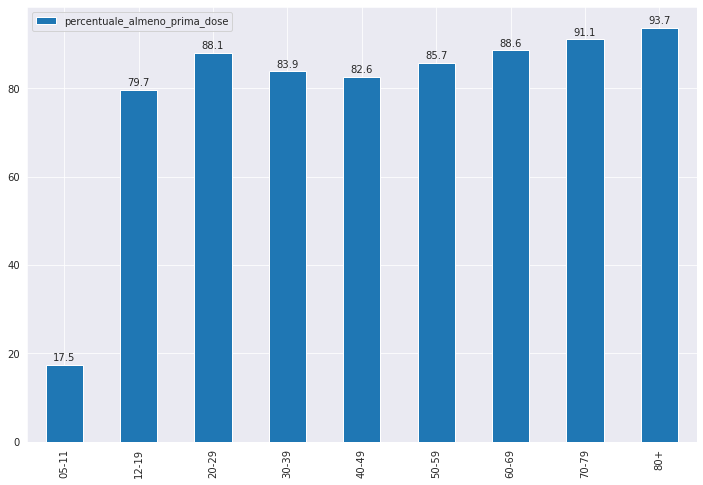

In [92]:
fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose', ax = ax)
add_value_labels(ax, spacing=2)

In [62]:
df_fasce

,totale,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,ultimo_aggiornamento,totale_popolazione,totale_popolazione_booster,percentuale_almeno_prima_dose,percentuale_seconda_dose,percentuale_booster_su_tot
05-11,710421,366575,343846,638054,71340,1027,0,2022-01-11,3656069,NaN,17.451914,1.951276,0.0
12-19,7451089,3827847,3623242,3681050,3314789,120845,334405,2022-01-11,4618524,1955697.0,79.70187,71.771609,7.240517
20-29,11980203,6195040,5785163,5298385,4929971,211475,1540372,2022-01-11,6016071,3923418.0,88.07052,81.946689,25.604286
30-39,13056899,6635943,6420956,5697602,5293948,212040,1853309,2022-01-11,6794108,4271568.0,83.860928,77.919692,27.27818
40-49,17473740,8629358,8844382,7255604,6790826,288379,3138931,2022-01-11,8782667,6039860.0,82.612764,77.320773,35.740066
50-59,21011674,10292268,10719406,8271102,7648930,341075,4750567,2022-01-11,9645613,7425366.0,85.749884,79.299574,49.251064
60-69,17537271,8530336,9006935,6691706,6107419,232556,4505590,2022-01-11,7553311,6354604.0,88.593016,80.857507,59.650529
70-79,14989262,7073056,7916206,5481864,5234707,158666,4114025,2022-01-11,6018697,5352165.0,91.080578,86.974091,68.354081
80+,12045622,4746877,7298745,4294062,4194268,96537,3460755,2022-01-11,4580954,4216335.0,93.737287,91.558833,75.5466


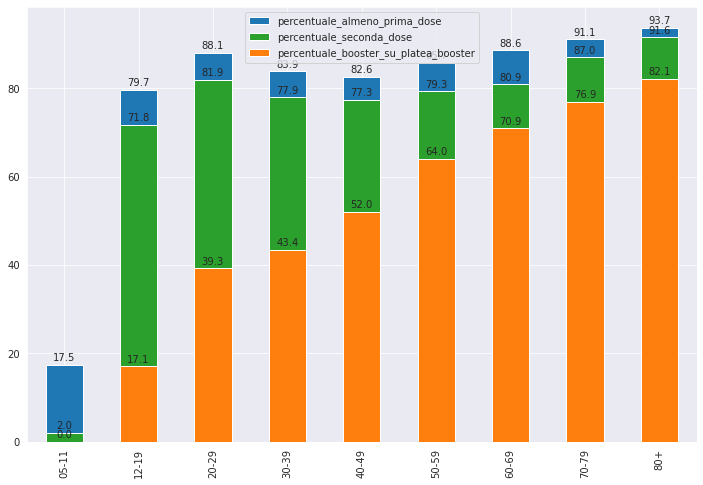

In [94]:
fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = 'percentuale_almeno_prima_dose', ax = ax, color="tab:blue")
df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax, color="tab:green")
df_fasce.plot(kind = 'bar', y = 'percentuale_booster_su_platea_booster', ax = ax, color="tab:orange")
add_value_labels(ax)


### Percentuali somminisstrazione vaccini ad oggi

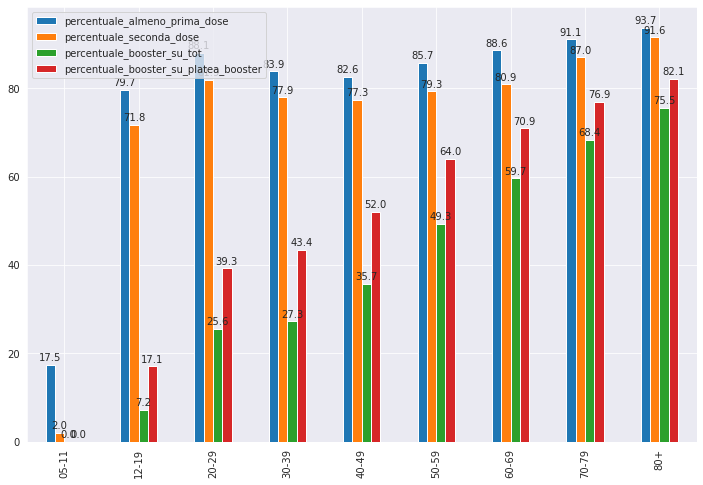

In [93]:
fig, ax = plt.subplots(figsize =(12, 8))  #figsize =(5, 5)
df_fasce.plot(kind = 'bar', y = ['percentuale_almeno_prima_dose','percentuale_seconda_dose',\
                                 'percentuale_booster_su_tot', 'percentuale_booster_su_platea_booster'], ax = ax)#, color="tab:blue")
#df_fasce.plot(kind = 'bar', y = 'percentuale_seconda_dose', ax = ax, color="tab:green")
#df_fasce.plot(kind = 'bar', y = 'percentuale_booster', ax = ax, color="tab:orange")
add_value_labels(ax)


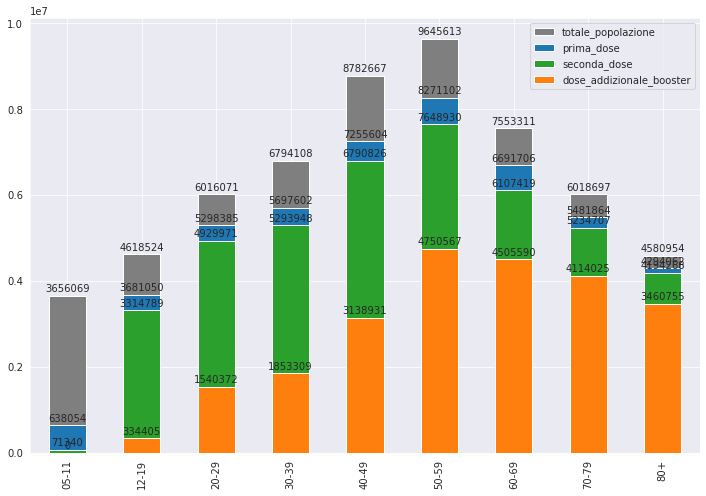

In [66]:
fig, ax = plt.subplots(figsize =(12, 8)) 
df_fasce.plot(kind = 'bar', y = 'totale_popolazione', ax = ax, color = "tab:grey")
df_fasce.plot(kind = 'bar', y = 'prima_dose', ax = ax, color="tab:blue")
df_fasce.plot(kind = 'bar', y = 'seconda_dose', ax = ax, color="tab:green" )
df_fasce.plot(kind = 'bar', y = 'dose_addizionale_booster', ax = ax, color="tab:orange")
add_value_labels(ax, spacing=2, n_decimals = 0 )


## Percentuale vaccinati sul totale

In [67]:
df_fasce_trans = df_fasce.transpose()
df_fasce_trans

,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
totale,710421,7451089,11980203,13056899,17473740,21011674,17537271,14989262,12045622
sesso_maschile,366575,3827847,6195040,6635943,8629358,10292268,8530336,7073056,4746877
sesso_femminile,343846,3623242,5785163,6420956,8844382,10719406,9006935,7916206,7298745
prima_dose,638054,3681050,5298385,5697602,7255604,8271102,6691706,5481864,4294062
seconda_dose,71340,3314789,4929971,5293948,6790826,7648930,6107419,5234707,4194268
pregressa_infezione,1027,120845,211475,212040,288379,341075,232556,158666,96537
dose_addizionale_booster,0,334405,1540372,1853309,3138931,4750567,4505590,4114025,3460755
ultimo_aggiornamento,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11
totale_popolazione,3656069,4618524,6016071,6794108,8782667,9645613,7553311,6018697,4580954
totale_popolazione_booster,NaN,1955697.0,3923418.0,4271568.0,6039860.0,7425366.0,6354604.0,5352165.0,4216335.0


In [70]:
df_fasce_trans.loc[:, 'tot_all']  = df_fasce_trans.sum(axis=1)
df_fasce_trans.loc[:, 'tot_>12'] = df_fasce_trans.drop(columns = ['05-11', 'tot_all']).sum(axis=1)
df_fasce_trans

,05-11,12-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,tot_all,tot_>12
totale,710421,7451089,11980203,13056899,17473740,21011674,17537271,14989262,12045622,116256181,115545760
sesso_maschile,366575,3827847,6195040,6635943,8629358,10292268,8530336,7073056,4746877,56297300,55930725
sesso_femminile,343846,3623242,5785163,6420956,8844382,10719406,9006935,7916206,7298745,59958881,59615035
prima_dose,638054,3681050,5298385,5697602,7255604,8271102,6691706,5481864,4294062,47309429,46671375
seconda_dose,71340,3314789,4929971,5293948,6790826,7648930,6107419,5234707,4194268,43586198,43514858
pregressa_infezione,1027,120845,211475,212040,288379,341075,232556,158666,96537,1662600,1661573
dose_addizionale_booster,0,334405,1540372,1853309,3138931,4750567,4505590,4114025,3460755,23697954,23697954
ultimo_aggiornamento,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-11,2022-01-112022-01-112022-01-112022-01-112022-0...,2022-01-112022-01-112022-01-112022-01-112022-0...
totale_popolazione,3656069,4618524,6016071,6794108,8782667,9645613,7553311,6018697,4580954,57666014,54009945
totale_popolazione_booster,NaN,1955697.0,3923418.0,4271568.0,6039860.0,7425366.0,6354604.0,5352165.0,4216335.0,39539013.0,39539013.0


In [114]:
def percentuale_vaccinati(colonna, tipo_dose = 'prima_dose', totale = 'totale_popolazione'): 
    return round(df_fasce_trans.loc[tipo_dose, colonna]/ df_fasce_trans.loc[totale, colonna]*100, 2)

### Percentuale totale di vaccinati almeno con prima dose sul totale della platea vaccinabile

In [115]:
percentuale_vaccinati('tot_all')

82.04

In [116]:
percentuale_vaccinati('tot_>12')


86.41

### Percentuale totale di vaccinati almeno con seconda dose

In [118]:
percentuale_vaccinati('tot_all', tipo_dose='seconda_dose')

75.58

In [119]:
percentuale_vaccinati('tot_>12', tipo_dose='seconda_dose')

80.57

### Percentuale totale di vaccinati booster

In [121]:
percentuale_vaccinati('tot_all', tipo_dose='dose_addizionale_booster', totale = 'totale_popolazione_booster')

59.94

In [122]:
percentuale_vaccinati('tot_all', tipo_dose='dose_addizionale_booster', totale = 'totale_popolazione')

41.1

In [123]:
percentuale_vaccinati('tot_all', tipo_dose='dose_addizionale_booster', totale = 'seconda_dose')

54.37